In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/ACER/Downloads/main project-bank-full.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact      14
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome     10
Target        0
dtype: int64

In [5]:
df.isnull().mean()

age          0.000000
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.000310
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000221
Target       0.000000
dtype: float64

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
# check the data frame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45197 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45201 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# find the number of rows and column
df.shape

(45211, 17)

In [9]:
# describe data numerical columns
# statistics of individual features
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# let us understand categorical features and unique values
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' nan 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' nan 'failure' 'other' 'success']
Target
['no' 'yes']


In [11]:
# find features with one value
df['age'].nunique()

77

In [12]:
df['job'].nunique()

12

In [13]:
df['marital'].nunique()

3

In [14]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
Target 2


In [15]:
# bucket boundaries
buckets = [0, 20, 40, 60, 1000]
# bucket labels
labels = ['0-20', '20-40', '40-60', '>60']

# discretisation
df['Age_buckets_labels'] = pd.cut(
    df['age'], bins=buckets, labels=labels, include_lowest=True)

df['Age_buckets'] = pd.cut(df['age'], bins=buckets, include_lowest=True)
df['loan'] = np.where(df['loan'] =='yes', 1, 0)
mar =[0,1,2]

df['housing'] = np.where(df['housing'] =='yes', 1, 0)
df['marital'] = np.where(df['marital'] =='married', 0,np.where(df['marital'] =='single', 1,np.where(df['marital'] =='divorced', 2, -1)))

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets
0,58,management,0,tertiary,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
1,44,technician,1,secondary,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
2,33,entrepreneur,0,secondary,no,2,1,1,unknown,5,may,76,1,-1,0,NaN,no,20-40,"(20.0, 40.0]"
3,47,blue-collar,0,unknown,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
4,33,unknown,1,unknown,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,20-40,"(20.0, 40.0]"


In [16]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets
45206,51,technician,0,tertiary,no,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes,40-60,"(40.0, 60.0]"
45207,71,retired,2,primary,no,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes,>60,"(60.0, 1000.0]"
45208,72,retired,0,secondary,no,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes,>60,"(60.0, 1000.0]"
45209,57,blue-collar,0,secondary,no,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no,40-60,"(40.0, 60.0]"
45210,37,entrepreneur,0,secondary,no,2971,0,0,cellular,17,nov,361,2,188,11,other,no,20-40,"(20.0, 40.0]"


In [17]:
df.groupby('Age_buckets_labels')['age'].count()

Age_buckets_labels
0-20        97
20-40    24620
40-60    19306
>60       1188
Name: age, dtype: int64

<AxesSubplot:xlabel='Age_buckets_labels'>

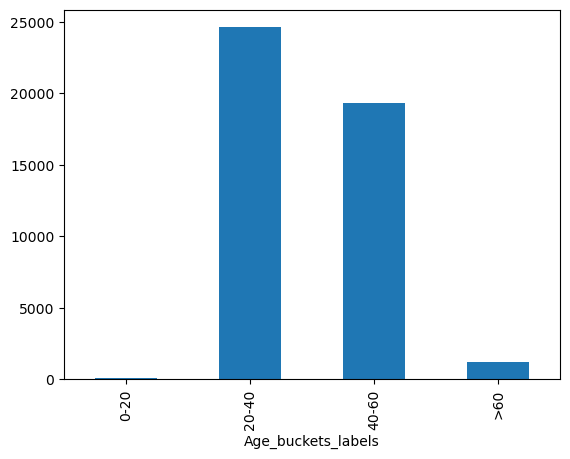

In [18]:
df.groupby('Age_buckets_labels')['age'].count().plot.bar()

In [19]:
df.groupby('loan')['Age_buckets_labels'].count()

loan
0    37967
1     7244
Name: Age_buckets_labels, dtype: int64

<AxesSubplot:xlabel='loan'>

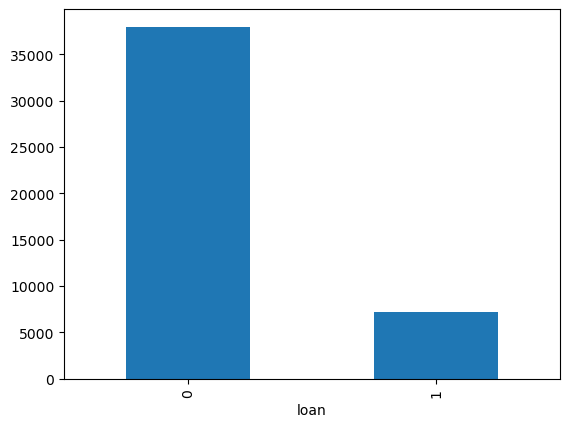

In [20]:
df.groupby('loan')['Age_buckets_labels'].count().plot.bar()

In [21]:
df.groupby('Age_buckets_labels')['housing'].count()

Age_buckets_labels
0-20        97
20-40    24620
40-60    19306
>60       1188
Name: housing, dtype: int64

<AxesSubplot:xlabel='Age_buckets_labels'>

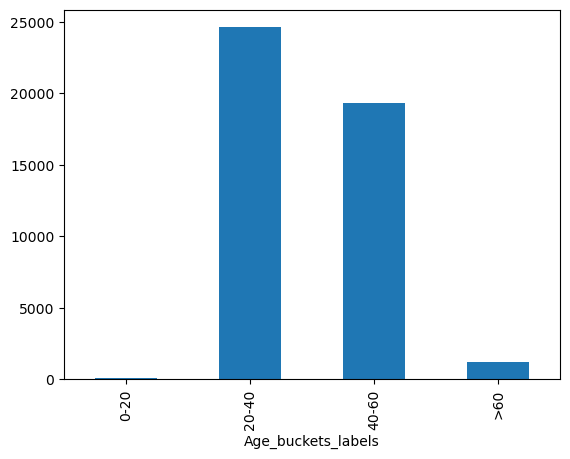

In [22]:
df.groupby('Age_buckets_labels')['housing'].count().plot.bar()

In [23]:
df.groupby('job')['housing'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: housing, dtype: int64

<AxesSubplot:xlabel='job'>

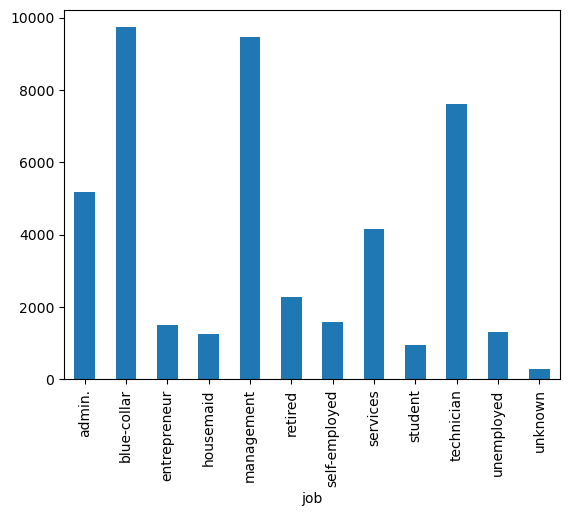

In [24]:
df.groupby('job')['housing'].count().plot.bar()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

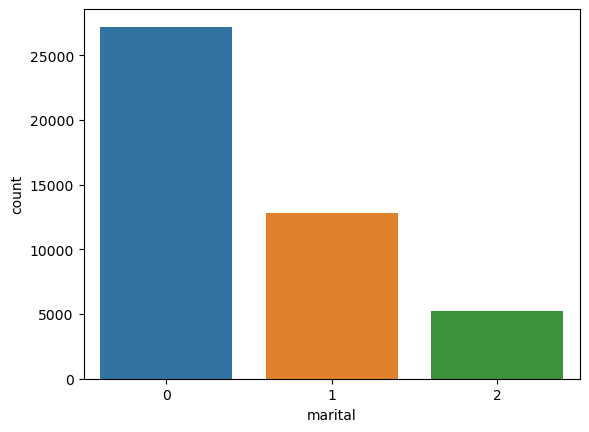

In [25]:
sns.countplot(df['marital'])


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

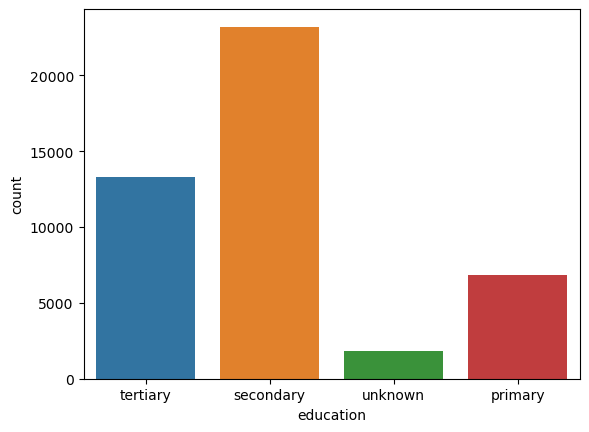

In [26]:
sns.countplot(df['education'])

<AxesSubplot:xlabel='job'>

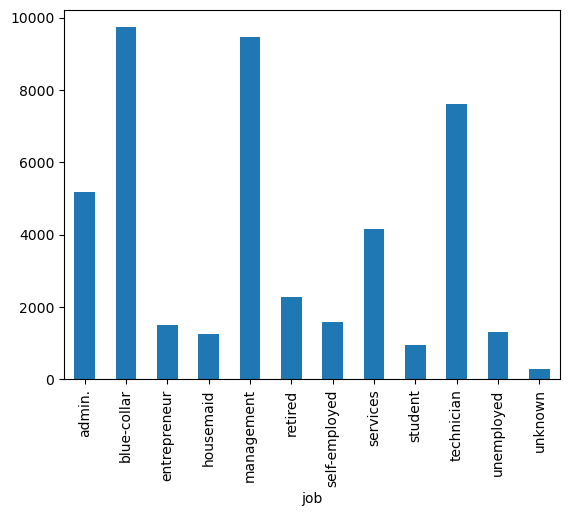

In [27]:
df.groupby('job')['housing'].count().plot.bar()

In [28]:
df.groupby('job')['housing'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: housing, dtype: int64

In [29]:
df.groupby('job')['housing'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: housing, dtype: int64

<AxesSubplot:xlabel='job'>

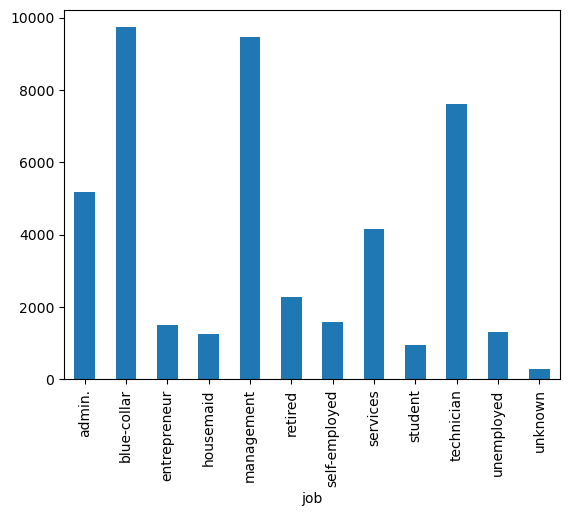

In [30]:
df.groupby('job')['housing'].count().plot.bar()

In [31]:
df.groupby('job')['balance'].mean()

job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
unknown          1772.357639
Name: balance, dtype: float64

<AxesSubplot:xlabel='job'>

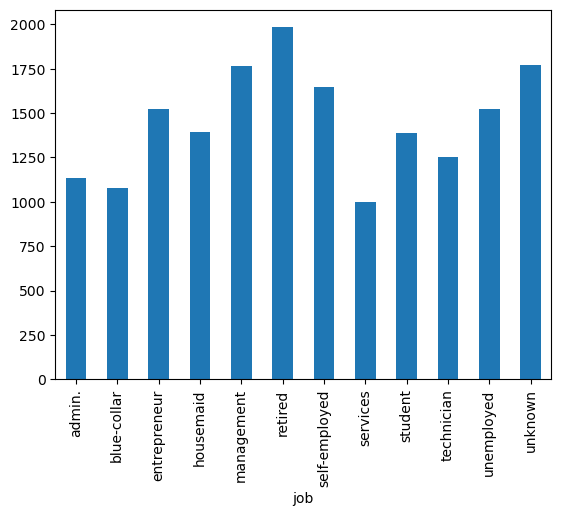

In [32]:
df.groupby('job')['balance'].mean().plot.bar()

In [33]:
df.groupby('job')['balance'].mean()

job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
unknown          1772.357639
Name: balance, dtype: float64

<AxesSubplot:xlabel='job'>

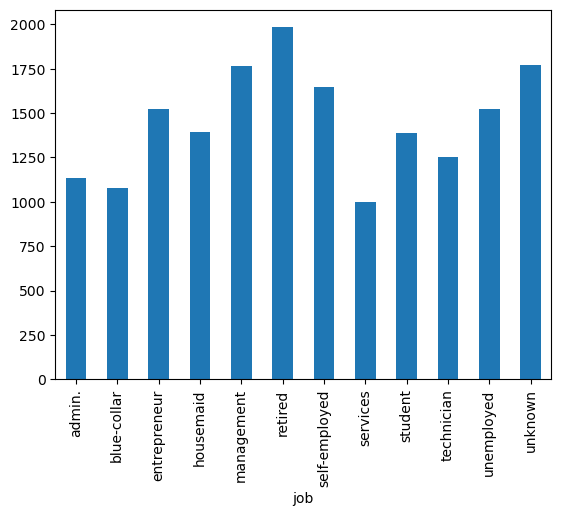

In [34]:
df.groupby('job')['balance'].mean().plot.bar()

<AxesSubplot:>

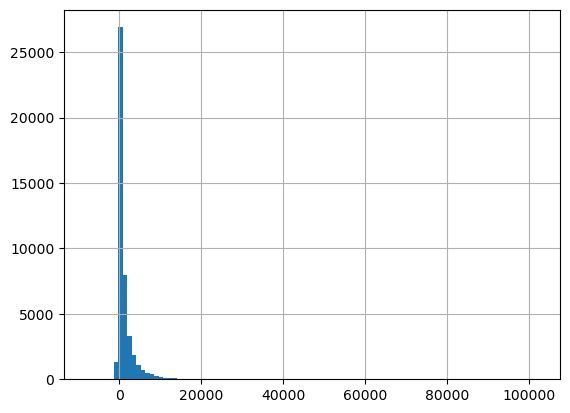

In [35]:
df['balance'].hist(bins=100)

<AxesSubplot:>

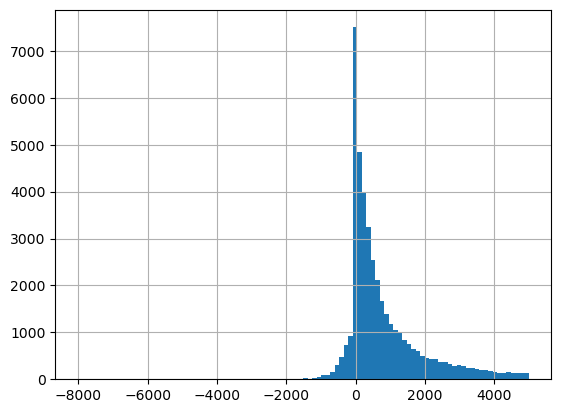

In [36]:
# and now let's look at the lower balance in more detail

df[df['balance']<5000]['balance'].hist(bins=100)

<AxesSubplot:>

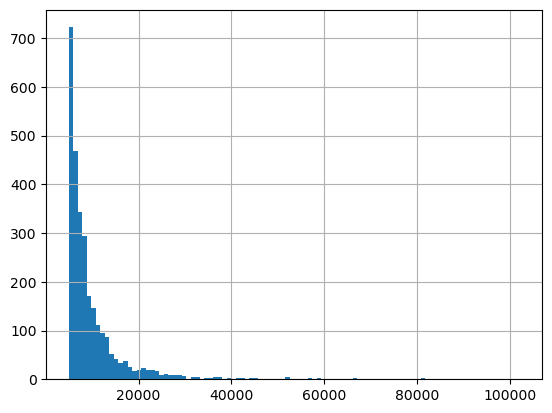

In [37]:
df[df['balance']>5000]['balance'].hist(bins=100)

In [38]:
# and now let's divide into arbitrary buckets, assuming that these make business sense

# bucket interval
buckets = [-10000,0, 5000, 10000, 15000, 20000,150000]

# bucket labels
labels = ['<0','0-5k', '5-10k', '10-15k', '15-20k', '>20k']

# discretisation
df['balance_buckets'] = pd.cut(
    df['balance'], bins=buckets, labels=labels, include_lowest=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets,balance_buckets
0,58,management,0,tertiary,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
1,44,technician,1,secondary,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
2,33,entrepreneur,0,secondary,no,2,1,1,unknown,5,may,76,1,-1,0,NaN,no,20-40,"(20.0, 40.0]",0-5k
3,47,blue-collar,0,unknown,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
4,33,unknown,1,unknown,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,20-40,"(20.0, 40.0]",0-5k


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '<0'),
  Text(1, 0, '0-5k'),
  Text(2, 0, '5-10k'),
  Text(3, 0, '10-15k'),
  Text(4, 0, '15-20k'),
  Text(5, 0, '>20k')])

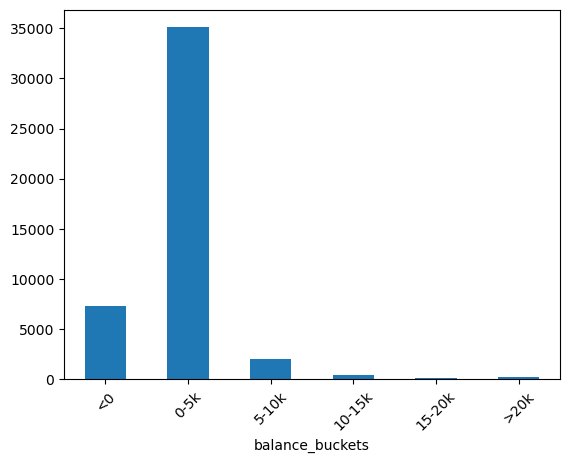

In [39]:
df.groupby(['balance_buckets'])['balance'].count().plot.bar()
plt.xticks(rotation=45)

In [40]:
df.groupby(['balance_buckets'])['balance'].count()

balance_buckets
<0         7280
0-5k      35086
5-10k      2016
10-15k      478
15-20k      158
>20k        193
Name: balance, dtype: int64

In [41]:
df.groupby(['balance_buckets'])['default'].count()

balance_buckets
<0         7280
0-5k      35086
5-10k      2016
10-15k      478
15-20k      158
>20k        193
Name: default, dtype: int64

In [42]:
df.groupby(['marital']).count()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets,balance_buckets
marital,,,,,,,,,,,,,,,,,,,
0,27214,27214,27214,27214,27214,27214,27214,27204,27214,27214,27214,27214,27214,27214,27209,27214,27214,27214,27214
1,12790,12790,12790,12790,12790,12790,12790,12787,12790,12790,12790,12790,12790,12790,12786,12790,12790,12790,12790
2,5207,5207,5207,5207,5207,5207,5207,5206,5207,5207,5207,5207,5207,5207,5206,5207,5207,5207,5207


<AxesSubplot:xlabel='marital'>

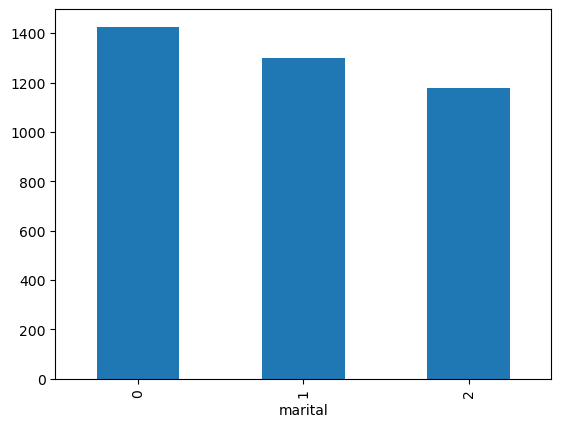

In [43]:
df.groupby(['marital'])['balance'].mean().plot.bar()

### Plot pie chart for subscribe/ Not

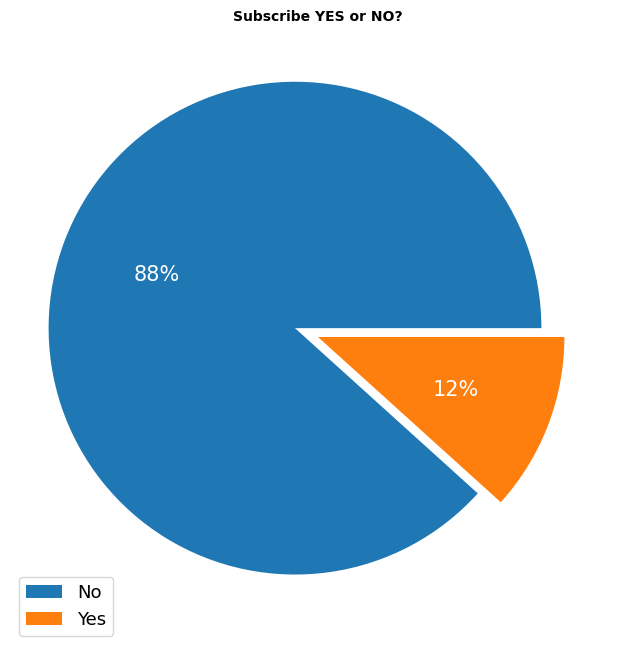

In [44]:
plt.figure(figsize=(8,8))
plt.title("Subscribe YES or NO?", size=10, fontweight='bold')
plt.pie(df['Target'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'}, explode=(0.1, 0))
plt.legend(['No', 'Yes'], loc='lower left', fontsize=13)
plt.show()

In [45]:
df['Target']=np.where(df['Target']=='yes',1,0)
df.describe()

,age,marital,balance,housing,loan,day,duration,campaign,pdays,previous,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.513238,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.692948,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,2.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


### Numerical figures Correlation

In [46]:
df[['age','balance','day','duration','pdays','previous']].corr()

,age,balance,day,duration,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.001565,0.001203
pdays,-0.023758,0.003435,-0.093044,-0.001565,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,0.454820,1.000000


<AxesSubplot:>

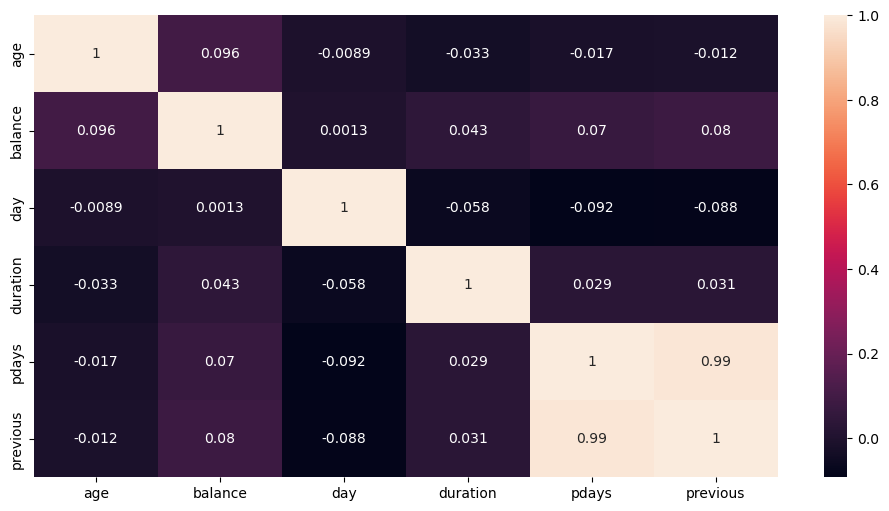

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['age','balance','day','duration','pdays','previous']].corr('spearman'),annot=True)

In [48]:
df_unchanged=df

In [49]:
df_unchanged[['job','marital','education','default','housing','loan','Target']].corr()


,marital,housing,loan,Target
marital,1.000000,-0.011671,-0.018526,0.043846
housing,-0.011671,1.000000,0.041323,-0.139173
loan,-0.018526,0.041323,1.000000,-0.068185
Target,0.043846,-0.139173,-0.068185,1.000000


<AxesSubplot:>

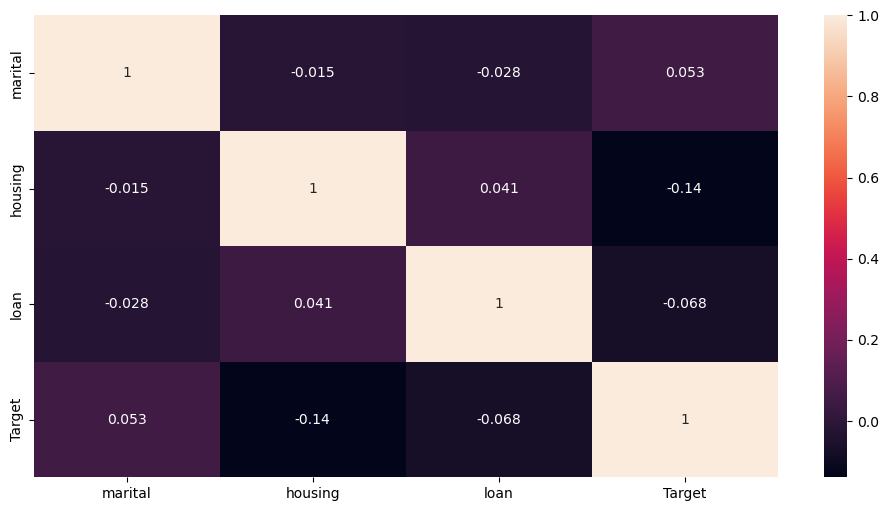

In [50]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_unchanged[['job','marital','education','default','housing','loan','Target']].corr('spearman'), annot=True)

<AxesSubplot:xlabel='Target', ylabel='count'>

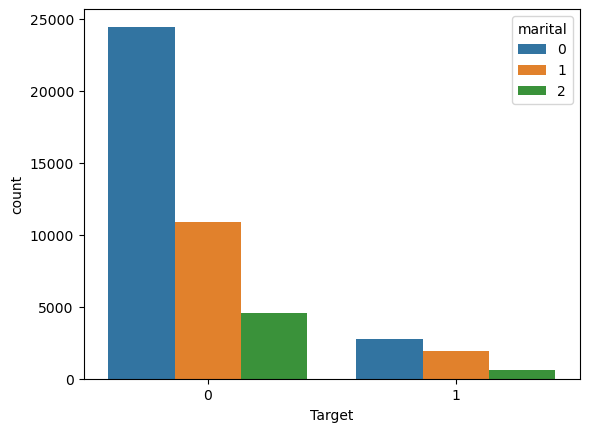

In [51]:
sns.countplot(data= df, x='Target', hue='marital')

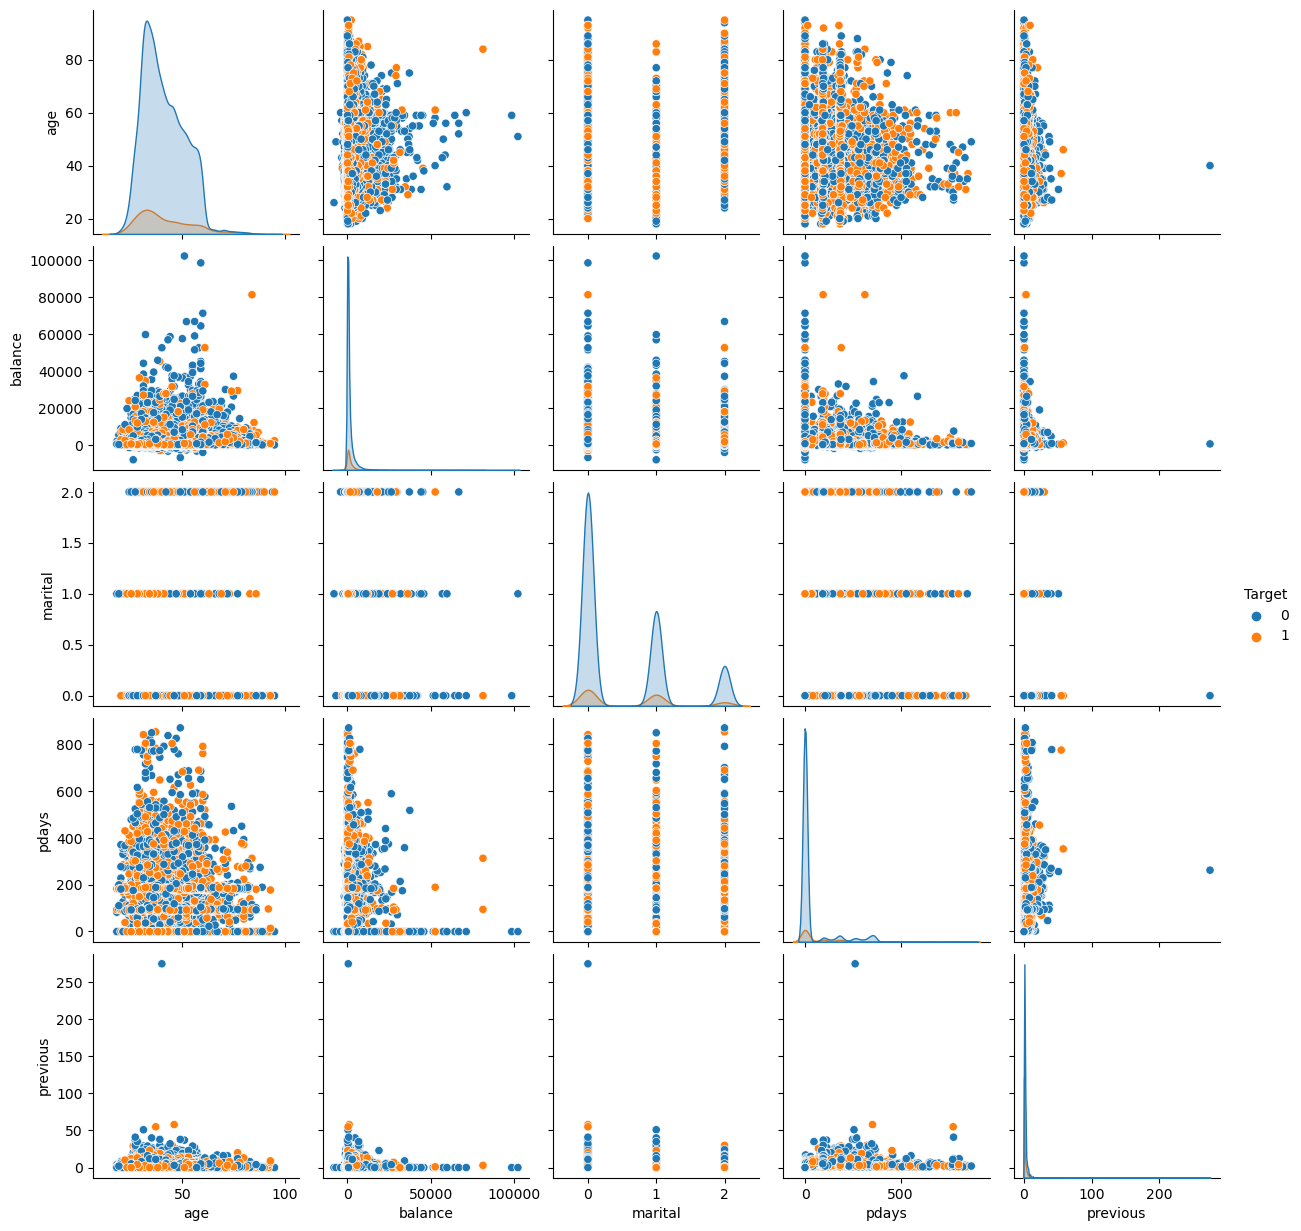

In [52]:
sns.pairplot(data= df[['age','balance','marital','pdays', 'previous','Target']], hue='Target')

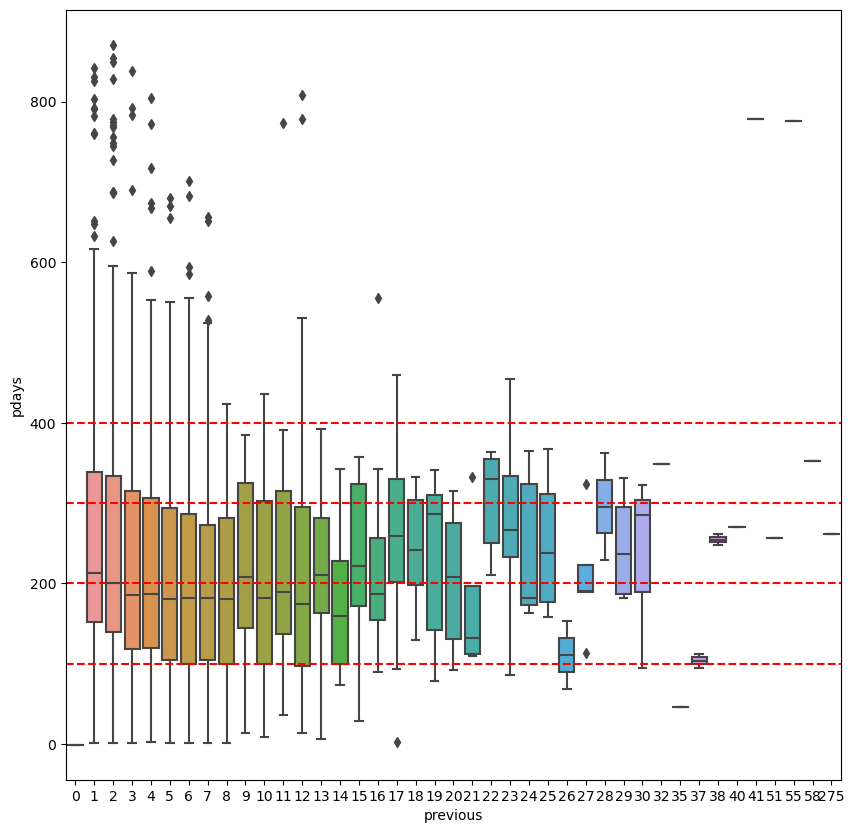

In [53]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['pdays'],
            x=df['previous'])
reference = [100, 200, 300, 400]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()


### install imbalanced -learn

In [96]:
 pip install -U imbalanced-learn

     ------------------------------------ 226.0/226.0 kB 531.4 kB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# split the dataset from the dataframe

In [97]:
x=df.drop(['Target'],axis=1)
y=df['Target']

In [98]:
# class distribution

In [99]:
y.value_counts() # 0-No & 1-yes

0    39913
1     5278
Name: Target, dtype: int64

In [100]:
 # show pie plot

<AxesSubplot:ylabel='Target'>

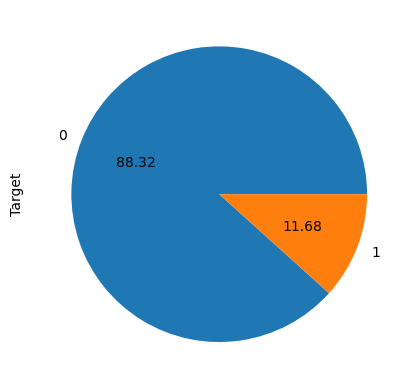

In [101]:
y.value_counts().plot.pie(autopct='%.2f')

In [110]:
# random understanding - meaning that the majority class will be reduced so that it will have the same proportion as the minority class

In [ ]:
# resample all classses but the minority class

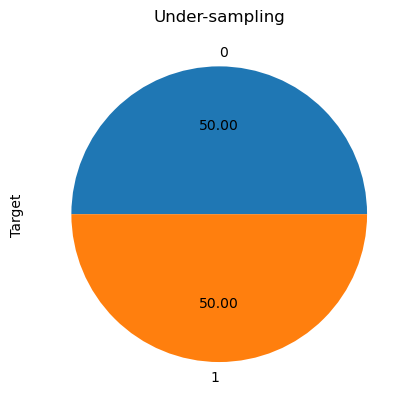

In [108]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(sampling_strategy=1) 
x_res,y_res=rus.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_ =ax.set_title("Under-sampling")


In [109]:
# class distribution
y_res.value_counts()

0    5278
1    5278
Name: Target, dtype: int64

In [111]:
# random oversampling - resample all the classes  but the majority class

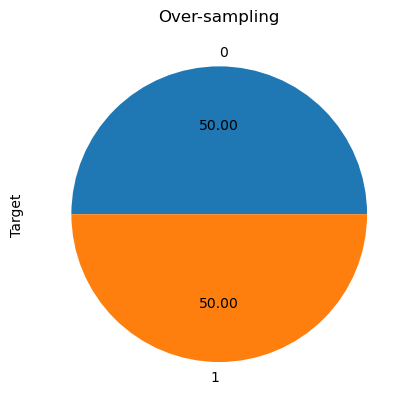

In [113]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(sampling_strategy='not majority') 
x_res,y_res=ros.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_ =ax.set_title("Over-sampling")


In [114]:
# class distribution
y_res.value_counts()

0    39913
1    39913
Name: Target, dtype: int64